# Assignment #4 - Deep Learning

### <font color="red"> DUE: Apr 10 (Friday) 11:00 pm </font>  

<font color="blue"> Jimmy Nguyen </font>

# I. Overview

For this assignment, I will using the concepts of deep learning and applying it onto my data. I will also be creating three different structures on my data and compare them.

# II. Data

This data set contains data based on many car samples with different varying characteristics that determine the overall quality of the vechicle. This data set has all possible combiniations of these characteristics.

In this data set, there are six parameters that factor into the evalutation: Price, maintenance cost, number of doors, passenger capacity, luggage boot size and safety rating. The value of the car is scored from unacceptable to very good.

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy as copy

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import sys
assert sys.version_info >= (3, 5)

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0" # check if your ensorflow version is above 2.0

In [3]:
import os

# To plot pretty figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
df = pd.read_csv("car.data", names=["Buy", "Maint", "Doors", "Persons", "Lug_boot", "Safety", "Value"])
df

Buy  Maint  Doors Persons Lug_boot Safety  Value
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
5     vhigh  vhigh      2       2      med   high  unacc
6     vhigh  vhigh      2       2      big    low  unacc
7     vhigh  vhigh      2       2      big    med  unacc
8     vhigh  vhigh      2       2      big   high  unacc
9     vhigh  vhigh      2       4    small    low  unacc
10    vhigh  vhigh      2       4    small    med  unacc
11    vhigh  vhigh      2       4    small   high  unacc
12    vhigh  vhigh      2       4      med    low  unacc
13    vhigh  vhigh      2       4      med    med  unacc
14    vhigh  vhigh      2       4      med   high  unacc
15    vhigh  vhigh      2       4      big    low  unacc
16    vhigh  vhigh      2       4      big    med  unacc
17    vhigh  vhigh      2       4      big   high  unacc
18    vhigh  vhigh      2    more    small    low  unacc
19    vhigh  vhigh      2    more    small    med  unacc
20    vhigh  vhigh      2    more    small   high  unacc
21    vhigh  vhigh      2    more      med    low  unacc
22    vhigh  vhigh      2    more      med    med  unacc
23    vhigh  vhigh      2    more      med   high  unacc
24    vhigh  vhigh      2    more      big    low  unacc
25    vhigh  vhigh      2    more      big    med  unacc
26    vhigh  vhigh      2    more      big   high  unacc
27    vhigh  vhigh      3       2    small    low  unacc
28    vhigh  vhigh      3       2    small    med  unacc
29    vhigh  vhigh      3       2    small   high  unacc
...     ...    ...    ...     ...      ...    ...    ...
1698    low    low      4    more      big    low  unacc
1699    low    low      4    more      big    med   good
1700    low    low      4    more      big   high  vgood
1701    low    low  5more       2    small    low  unacc
1702    low    low  5more       2    small    med  unacc
1703    low    low  5more       2    small   high  unacc
1704    low    low  5more       2      med    low  unacc
1705    low    low  5more       2      med    med  unacc
1706    low    low  5more       2      med   high  unacc
1707    low    low  5more       2      big    low  unacc
1708    low    low  5more       2      big    med  unacc
1709    low    low  5more       2      big   high  unacc
1710    low    low  5more       4    small    low  unacc
1711    low    low  5more       4    small    med    acc
1712    low    low  5more       4    small   high   good
1713    low    low  5more       4      med    low  unacc
1714    low    low  5more       4      med    med   good
1715    low    low  5more       4      med   high  vgood
1716    low    low  5more       4      big    low  unacc
1717    low    low  5more       4      big    med   good
1718    low    low  5more       4      big   high  vgood
1719    low    low  5more    more    small    low  unacc
1720    low    low  5more    more    small    med    acc
1721    low    low  5more    more    small   high   good
1722    low    low  5more    more      med    low  unacc
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]

The data shown is based on six attributes: Frequency (in hertzs), angle of attack (in degrees), chord length (in meters), free-stream velocity (meters per second), and suction side displacement thickness (in meters). The data displays the scaled sound pressure level based on the varying inputs. 

In [5]:
#"Buy", "Maint", "Doors", "Persons", "Lug_boot", "Safety", "Value"

#conversion
buyDic = {'low': 1, 'med':2, 'high':3, 'vhigh':4}
maintDic = {'low': 1, 'med':2, 'high':3, 'vhigh':4}
doorDic = {'2': 2, '3': 3, '4': 4, '5more': 5}
personDic = {'2': 2, '4': 4, 'more': 5}
lugDic = {'small': 1, 'med': 2, 'big': 3}
safeDic = {'low': 1, 'med': 2, 'high': 3}
valueDic = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

def buy_conv(s):
    return buyDic[s]
def maint_conv(s):
    return maintDic[s]
def door_conv(s):
    return doorDic[s]
def person_conv(s):
    return personDic[s]
def lug_conv(s):
    return lugDic[s]
def safe_conv(s):
    return safeDic[s]
def value_conv(s):
    return valueDic[s]

df['Buy'] = df['Buy'].apply(buy_conv)
df['Maint'] = df['Maint'].apply(maint_conv)
df['Doors'] = df['Doors'].apply(door_conv)
df['Persons'] = df['Persons'].apply(person_conv)
df['Lug_boot'] = df['Lug_boot'].apply(lug_conv)
df['Safety'] = df['Safety'].apply(safe_conv)
df['Value'] = df['Value'].apply(value_conv)

Buy                                            Doors      ...   \
        count mean       std  min   25%  50%   75%  max  count mean ...    
Safety                                                              ...    
1       576.0  2.5  1.119006  1.0  1.75  2.5  3.25  4.0  576.0  3.5 ...    
2       576.0  2.5  1.119006  1.0  1.75  2.5  3.25  4.0  576.0  3.5 ...    
3       576.0  2.5  1.119006  1.0  1.75  2.5  3.25  4.0  576.0  3.5 ...    

       Persons       Value                                               
           75%  max  count      mean       std  min  25%  50%  75%  max  
Safety                                                                   
1          5.0  5.0  576.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
2          5.0  5.0  576.0  0.447917  0.619168  0.0  0.0  0.0  1.0  2.0  
3          5.0  5.0  576.0  0.796875  0.971985  0.0  0.0  1.0  1.0  3.0  

[3 rows x 48 columns]

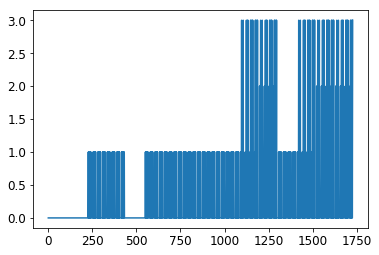

In [6]:
plt.plot('Value', data = df)

group_by_safety = df.groupby(by='Safety')
group_by_safety.describe()

# Preliminary Observation

This graph represents the overall quality of the car based on the data of over 1750 samples. Based on the unique samples, many of the acceptable cars tend to have low purchase price and low maintenance. The sample cars are classified by many things that people would consider when purchasing a car. The trends to go for more seating and safety. Many of the later samples are acceptable, and tend to be very similar in terms of build.

# III. Methods

In this assignment, you are building a deep network with more than 5 layers using TensorFlow and Keras. (If you are familar with other deep learning packages such as PyTorch and others, you are fine to use one of them.
)
Think about three different structures (different numbers and layers of deep neural networks) and explain why you come up with them. Why do you think your structure will work well on your data?  


Looking at the chart at the bottome of this assignment, get some idea about how you can construct your networks for what problem and why you pick your structure.
But do not get misguided as what the assignment is asking is not implementing one of them.
Just playing with the number layers and the number hidden units on each layer will suffice the requiremenet of this assignment. 

Here follows the steps to follow:

1. Pick at least 3 different network structures for experiments.
2. Summarize the choice of your networks and then explain why it would be better than any other structures. 
3. Explain your TensorFlow (or Keras) codes. 
4. Explain how you apply your model to your data. 

# Three Network Structures

For my structures, I decided to have a basic model that uses two dense layers with 6 and 3 units, another model that uses four layers with different hidden units, and the last model that uses five layers using the same amount of hidden units.

# TensorFlow

For my TensorFlow code, I first had to assign X and T and partition my data. After that, I add the bias and normalize the data, I create the structures and use TensorBoard to help visualize the results. In the models, it shows the loss, optimizers, and the accuracy metric to help present the results. All three models are different and will have varying results, as shown below.

# IV - Results

- Presents the results of applications of your deep networks.
- Visualize the results 
- Discuss about the choice of network structures and performance of it as you change the structures.  
- Comparing to your previous Neural Network results, how well your deep learning models work? 
- What do you think about the results? 


In [7]:
T = df.loc[:, 'Value'].copy()
X = df.iloc[:, :-1].copy()

T = T.values
X = X.values

In [9]:
import partitionlib as ptl
import importlib
import partitionlib
importlib.reload(partitionlib);

def partition_data(X, T):
    """Partition data into train and test splits."""
    data, targets = ptl.partition(X, T)
    Xtrain, Xtest = data
    Ttrain, Ttest = targets
    return Xtrain, Xtest, Ttrain, Ttest

In [10]:
# Partition data
Xtrain, Xtest, Ttrain, Ttest = partition_data(X, T)
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (1382, 6)
Train target shape: (1382, 1)
Test data shape: (346, 6)
Test target shape: (346, 1)


In [11]:
# Save total number of features
D = Xtrain.shape[1]
# Save number of samples for train/trest
Ntrain, Ntest = Xtrain.shape[0], Xtest.shape[0]
print("Number of total features: {}".format(D))
print("Number of training samples: {}".format(Ntrain))
print("Number of testing samples: {}".format(Ntest))

Number of total features: 6
Number of training samples: 1382
Number of testing samples: 346


In [12]:
# Let's normalize the data first with Scikit.learn
from sklearn.preprocessing import StandardScaler

# Define standardization class and standardize our housing data
scaler = StandardScaler()
XtrainS = scaler.fit_transform(Xtrain)
XtestS = scaler.fit_transform(Xtest)

# Add bias to standardized data
X1trainS = np.c_[np.ones((Ntrain, 1)), XtrainS]
X1testS = np.c_[np.ones((Ntest, 1)), XtestS]

C:\Users\kenny\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kenny\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kenny\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kenny\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_log_1"
logdir = "{}/run-{}/".format(root_logdir, now)
logdir

'tf_log_1/run-20200411005315/'

In [14]:
# Build network structure
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='tanh'), 
    tf.keras.layers.Dense(3, activation='tanh')
])

# Build model with loss and optimizer 
model.compile(
    loss="mse", 
    optimizer=tf.keras.optimizers.SGD(lr=0.001), 
    metrics=['accuracy']
)

# Create a tensorboard callback for keras so we can visualize our graph and variables later with tensorboard later
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=root_logdir, histogram_freq=1)

In [15]:
history = model.fit(X1trainS, Ttrain, epochs=30, callbacks=[tensorboard_cb])

Train on 1382 samples
Epoch 1/30
1382/1382 [==============================] - 1s 385us/sample - loss: 0.7993 - accuracy: 0.1831
Epoch 2/30
1382/1382 [==============================] - 0s 45us/sample - loss: 0.7816 - accuracy: 0.1823
Epoch 3/30
1382/1382 [==============================] - 0s 51us/sample - loss: 0.7640 - accuracy: 0.1852
Epoch 4/30
1382/1382 [==============================] - 0s 48us/sample - loss: 0.7478 - accuracy: 0.1852
Epoch 5/30
1382/1382 [==============================] - 0s 47us/sample - loss: 0.7323 - accuracy: 0.1852
Epoch 6/30
1382/1382 [==============================] - 0s 41us/sample - loss: 0.7179 - accuracy: 0.1874
Epoch 7/30
1382/1382 [==============================] - 0s 53us/sample - loss: 0.7041 - accuracy: 0.1896
Epoch 8/30
1382/1382 [==============================] - 0s 64us/sample - loss: 0.6908 - accuracy: 0.1903
Epoch 9/30
1382/1382 [==============================] - 0s 35us/sample - loss: 0.6783 - accuracy: 0.1918
Epoch 10/30
1382/1382 [=========

# First model Results

In [16]:
%load_ext tensorboard
%tensorboard --port 6302 --logdir tf_log_1/

Reusing TensorBoard on port 6302 (pid 10348), started 0:05:19 ago. (Use '!kill 10348' to kill it.)

# Second model Results

In [17]:
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_log_2"
logdir = "{}/run-{}/".format(root_logdir, now)
logdir

'tf_log_2/run-20200411005329/'

In [18]:
# Build network structure
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='tanh'), 
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(6, activation='tanh')
    
])

# Build model with loss and optimizer 
model.compile(
    loss="mse", 
    optimizer=tf.keras.optimizers.SGD(lr=0.001), 
    metrics=['accuracy']
)

# Create a tensorboard callback for keras so we can visualize our graph and variables later with tensorboard later
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=root_logdir, histogram_freq=1)

In [19]:
history = model.fit(X1trainS, Ttrain, epochs=30, callbacks=[tensorboard_cb])

Train on 1382 samples
Epoch 1/30
1382/1382 [==============================] - 0s 303us/sample - loss: 0.8052 - accuracy: 0.0941
Epoch 2/30
1382/1382 [==============================] - 0s 44us/sample - loss: 0.7984 - accuracy: 0.0941
Epoch 3/30
1382/1382 [==============================] - 0s 54us/sample - loss: 0.7918 - accuracy: 0.0962
Epoch 4/30
1382/1382 [==============================] - 0s 48us/sample - loss: 0.7852 - accuracy: 0.0977
Epoch 5/30
1382/1382 [==============================] - 0s 44us/sample - loss: 0.7789 - accuracy: 0.0991
Epoch 6/30
1382/1382 [==============================] - 0s 43us/sample - loss: 0.7726 - accuracy: 0.1027
Epoch 7/30
1382/1382 [==============================] - 0s 44us/sample - loss: 0.7666 - accuracy: 0.1042
Epoch 8/30
1382/1382 [==============================] - 0s 53us/sample - loss: 0.7605 - accuracy: 0.1071
Epoch 9/30
1382/1382 [==============================] - 0s 64us/sample - loss: 0.7546 - accuracy: 0.1085
Epoch 10/30
1382/1382 [=========

In [28]:
%load_ext tensorboard
%tensorboard --port 6217 --logdir tf_log_2/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6217 (pid 11284), started 0:00:06 ago. (Use '!kill 11284' to kill it.)

In [22]:
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_log_3"
logdir = "{}/run-{}/".format(root_logdir, now)
logdir

'tf_log_3/run-20200411005427/'

In [23]:
# Build network structure
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='tanh'), 
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(10, activation='tanh'), 
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(10, activation='tanh')
    
])

# Build model with loss and optimizer 
model.compile(
    loss="mse", 
    optimizer=tf.keras.optimizers.SGD(lr=0.001), 
    metrics=['accuracy']
)

# Create a tensorboard callback for keras so we can visualize our graph and variables later with tensorboard later
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=root_logdir, histogram_freq=1)

In [24]:
history = model.fit(X1trainS, Ttrain, epochs=30, callbacks=[tensorboard_cb])

Train on 1382 samples
Epoch 1/30
1382/1382 [==============================] - 0s 293us/sample - loss: 0.7515 - accuracy: 0.0362
Epoch 2/30
1382/1382 [==============================] - 0s 49us/sample - loss: 0.7380 - accuracy: 0.0420
Epoch 3/30
1382/1382 [==============================] - 0s 52us/sample - loss: 0.7257 - accuracy: 0.0449
Epoch 4/30
1382/1382 [==============================] - 0s 58us/sample - loss: 0.7143 - accuracy: 0.0514
Epoch 5/30
1382/1382 [==============================] - 0s 53us/sample - loss: 0.7036 - accuracy: 0.0507
Epoch 6/30
1382/1382 [==============================] - 0s 52us/sample - loss: 0.6936 - accuracy: 0.0586
Epoch 7/30
1382/1382 [==============================] - 0s 55us/sample - loss: 0.6842 - accuracy: 0.0666
Epoch 8/30
1382/1382 [==============================] - 0s 78us/sample - loss: 0.6753 - accuracy: 0.0709
Epoch 9/30
1382/1382 [==============================] - 0s 59us/sample - loss: 0.6671 - accuracy: 0.0760
Epoch 10/30
1382/1382 [=========

# Third model Results

In [26]:
%load_ext tensorboard
%tensorboard --port 6214 --logdir tf_log_3/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6214 (pid 20260), started 0:00:39 ago. (Use '!kill 20260' to kill it.)

# Discussion

When I was comparing the models, I notice the accuracies of all models were very low, but the first model yielded a better accuracy, being around 20%. The loss of the models were decreasing over time. For the first model, the accuracy ranged around 20 percent. For the second model, it ranged around 10 percent, which is a lot lower. For the last model, the accuracy ranged around 20 percent, being similar to the first model.

To compare to using neural networks, these models did a bad job using low results. There was a lot of loss and errors which resulted in bad results. For the neural networks, the loss was not comparible to the models used for this assignment. Neural networks is better suited for this data set.

# Conclusions

While doing the assignment, I struggled to correctly display the graphs. Using activity 8 as a reference, I eventually figured it out. Adjusting the layers to run different experiments weren't too terrible. I think I learned more about Tenserflow than orginally. I had a hard time adapting around TensorFlow as it would give a lot of errors, making it harder to complete the experiements.

## Grading

Only well-written notebook will be graded. Please follow the structure and fill in as the other assignments. 

points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 10| Explanation of codes for each structure
40 | Results | Your Data
 |  5| Explanation of experimental codes
 | 15| plots for results 
 | 10| Discussions about the choice of network structures 
 | 10| Comparisons (among selected structures and vs shallow neural networks in A3)
5 | Conclusions 


#### Optional Extra Credits

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources, Google Colab or MAMBA cluster for this test. 
- [OPT 2] Implement one of neural networks in the chart below and apply it to some real data. 

#### Chart of Neural Networks

Hope this chart help you get some idea. Again, you do not implement one of these. If you want to practice some of these, save it for extra credit OPT 2. 

<img src="https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67" width=700 />

